In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00AADD'
#CNO_COLOR = 'black'

In [2]:
starttime = pytime.time()

#Trim Sessions
    #ilep.trimSessions('S:\\Sorts\DualRecording',replace=False)
    #endtime1 = pytime.time()
    #print('END TRIMMING')
    #Calculate Responsiveness
    #ilep.calculateResponsiveness('S:\\Sorts\DualRecording',replace=True)
    #endtime2 = pytime.time()
    #print('END RESPONSIVENESS')
    #Finish
ilep.loadSessionsComplete('D:\\CNORecording',destination='D:\\CNO_Cache')
endtime = pytime.time()
print(str((endtime-starttime)/60/60)+' hours elapsed');

 33%|███▎      | 1/3 [00:00<00:00,  9.03it/s]

D:\CNORecording\BS_196\BS_196 1\M2\session_metadata.json missing. Skipping
D:\CNORecording\BS_196\BS_196 1\MGB\session_metadata.json missing. Skipping
BS_196 complete


 67%|██████▋   | 2/3 [00:00<00:00,  4.60it/s]

D:\CNORecording\BS_197\BS_197 1\M2\session_metadata.json missing. Skipping
D:\CNORecording\BS_197\BS_197 1\MGB\session_metadata.json missing. Skipping
BS_197 complete


100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

D:\CNORecording\OL_169\OL_169 1\M2\session_metadata.json missing. Skipping
D:\CNORecording\OL_169\OL_169 1\MGB\session_metadata.json missing. Skipping
OL_169 complete
D:\CNORecording complete
0.000310830208990309 hours elapsed


In [3]:
destination = 'D:\\CNO_Cache'
directory = destination

numbersessions = 0
numbergood = 0
numberdisq = 0
avgnumunits = []
numAC = 0
numM2 = 0

#Count number of units
sessions = os.listdir(directory)
for session in sessions:
    sessionfile = ilep.loadSessionCached(destination,session)
    
    print(sessionfile.meta.animal)
    
    numbergood = numbergood + len(sessionfile.clusters.good)
    numbersessions += 1

    avgnumunits.append(len(sessionfile.clusters.good))

    if sessionfile.meta.region == 'AC':
        numAC += len(sessionfile.clusters.good)
        #numAC += len(sessionfile.clusters.disqualified)
    elif sessionfile.meta.region == 'M2':
        numM2 += len(sessionfile.clusters.good)
        #numM2 += len(sessionfile.clusters.disqualified)
    else:
        pass

print(str(numbersessions)+' sessions')
        
print('AC: ' + str(numAC))
print('M2: ' + str(numM2))
print('Mean: '+str(np.mean(avgnumunits))+' units')
print('STD: '+str(np.std(avgnumunits))+' units')
print(sessionfile.meta)

BS_196
BS_197
OL_168
OL_169
PB_116
PB_116
PB_121_allunits
PB_121
PB_122_allunits
PB_122_allunits
PB_122
PB_122
PB_124_allunits
PB_124
14 sessions
AC: 81
M2: 216
Mean: 21.214285714285715 units
STD: 13.017452962567333 units
namespace(ISI_threshold_ms=1, animal='PB_124', application_minutes=15, application_type='catheter', arraystart=0, date='5/26/2022', depth=1000, directory='D:\\CNORecording\\PB_124\\PB_124 1\\M2\\', files=['May 26 2022 M2 CNO Verification Cath PB_124_1001'], fs=30000, injection_during_reversal='CNO', length_in_minutes=60.01924555555556, length_in_samples=108034642.0, length_in_seconds=3601.1547333333333, length_in_trials=0, probe=9627, region='M2', task='CNO', tonelength=0.1, triallength=2.5)


In [4]:
for idx,session in enumerate(sessions):
    sessionfile = ilep.loadSessionCached(destination,sessions[idx])
    print( str(idx) + ': '+sessionfile.meta.animal+' '+sessionfile.meta.date+'\t\t\t'+session)

0: OL_168 9/16/2022			OL_168_CNO_9-16-2022_AC.pickle
1: OL_169 9/23/2022			OL_169_CNO_9-23-2022_AC.pickle
2: PB_116 5/11/2022			PB_116_CNO_5-11-2022_M2.pickle
3: PB_116 5/17/2022			PB_116_CNO_5-17-2022_M2.pickle
4: PB_121_allunits 5/20/2022			PB_121_allunits_CNO_5-20-2022_M2.pickle
5: PB_121 5/20/2022			PB_121_CNO_5-20-2022_M2.pickle
6: PB_122_allunits 5/20/2022			PB_122_allunits_CNO_5-20-2022_M2.pickle
7: PB_122_allunits 5/23/2022			PB_122_allunits_CNO_5-23-2022_M2.pickle
8: PB_122 5/20/2022			PB_122_CNO_5-20-2022_M2.pickle
9: PB_122 5/23/2022			PB_122_CNO_5-23-2022_M2.pickle
10: PB_124_allunits 5/26/2022			PB_124_allunits_CNO_5-26-2022_M2.pickle
11: PB_124 5/26/2022			PB_124_CNO_5-26-2022_M2.pickle


In [8]:
#M2 DREADDs Ephys confirmation sessions
#sessions = ['PB_121_allunits_CNO_5-20-2022_M2.pickle','PB_122_allunits_CNO_5-20-2022_M2.pickle','PB_122_allunits_CNO_5-23-2022_M2.pickle','PB_124_allunits_CNO_5-26-2022_M2.pickle']

#sessions = ['OL_168_CNO_9-16-2022_AC.pickle']
sessions = ['OL_169_CNO_9-23-2022_AC.pickle']

cellsToRemove = dict()
cellsToRemove['OL_168_CNO_9-16-2022_AC.pickle'] = [17]
cellsToRemove['OL_169_CNO_9-23-2022_AC.pickle'] = []
cellsToRemove['BS_197_CNO_11-29-2022_AC.pickle'] = []

In [4]:
session = sessions[1]
sessionfile = ilep.loadSessionCached(destination,session)
print(sessionfile.meta)

namespace(animal='BS_197', application_minutes=15, application_type='catheter', arraystart=0, date='11/29/2022', depth=1300, directory='D:\\CNORecording\\BS_197\\BS_197 1\\AC\\', files=['November 29 2022 AC CNO Verification BS_197_1001'], fs=30000, injection_during_reversal='NA', length_in_minutes=60.00118722222222, length_in_samples=108002137.0, length_in_seconds=3600.071233333333, length_in_trials=0, lickdelayrelativetostart=0.2, lickdelayrelativetotone=0.1, probe=9716, region='AC', task='CNO', tonelength=0.1, triallength=2.5)


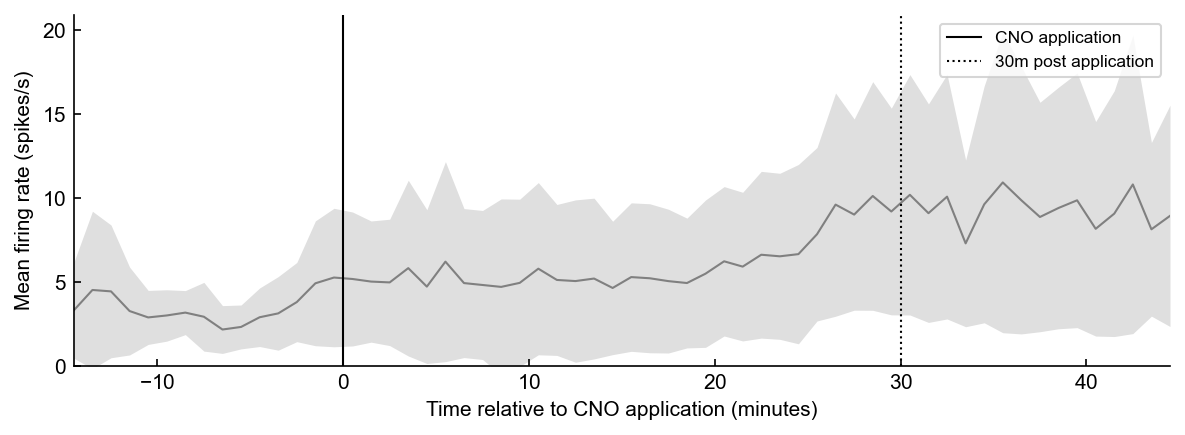

In [9]:
DIR = os.path.join('D:\\','Figures','CNO Traces')
sessionfile = ilep.loadSessionCached(destination,session)

application = sessionfile.meta.application_minutes
threshold = 1# Spikes/s

baselineSize = 6
validunits = []
for clust in sessionfile.clusters.good:
    
    if clust in cellsToRemove[session]:
        continue
    
    #Caching search
    idx = np.equal(sessionfile.spikes.clusters,clust)
    totaltimes = sessionfile.spikes.times[idx]
    
    #Calculate Baseline
    baselineStart = (application - baselineSize)*sessionfile.meta.fs*60
    baselineEnd = (application)*sessionfile.meta.fs*60
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,baselineStart) , np.less(totaltimes,baselineEnd)  )
    numspikesBaseline = np.sum(idx)
    
    if numspikesBaseline >= threshold * 60 * baselineSize:
        validunits.append(clust)

times = []
rates = []
stds = []
for minute in range(int(sessionfile.meta.length_in_minutes)):
    #The 0th minute is from minute 0 to minute 1, so the middle is 0.5
    times.append(minute+0.5)
    
    #Caching search
    minutestart = 60*sessionfile.meta.fs*minute
    minuteend = 60*sessionfile.meta.fs*(minute+1)
    idx = np.logical_and(  np.greater(sessionfile.spikes.times,minutestart) , np.less(sessionfile.spikes.times,minuteend)  ).flatten()
    totaltimes = sessionfile.spikes.times[idx]
    totalclusters = sessionfile.spikes.clusters[idx]
    
    numspikes = []
    for clust in validunits:
        idx = np.equal(totalclusters,clust)
        numspikes.append(len(totaltimes[idx]))
    
    rates.append(np.mean(numspikes)/60)
    stds.append(np.std(numspikes)/60)

times = np.array(times)
rates = np.array(rates)
stds = np.array(stds)
times = times - application

trans=0.25
fig,ax = plt.subplots(figsize=(8,3))
ax.fill_between(times,rates-stds,rates+stds,color='grey',alpha=trans,lw=0)
ax.plot(times,rates,color='grey',alpha=1,lw=1)

ylims = ax.get_ylim()
ylims = [0,ylims[1]]
ax.plot([0,0],ylims,color='black',alpha=1,lw=1,label = 'CNO application')
ax.plot([30,30],ylims,color='black',alpha=1,lw=1,linestyle=':',label = '30m post application')
ax.legend()
ax.set_ylim(ylims)
ax.set_xlim(np.min(times),np.max(times))

ax.set_ylabel('Mean firing rate (spikes/s)')
ax.set_xlabel('Time relative to CNO application (minutes)')

plt.tight_layout()
plt.savefig(os.path.join(DIR,sessionfile.meta.animal+' '+str(sessionfile.meta.date).replace('/','-')+' Mean FR.png'),facecolor='white')

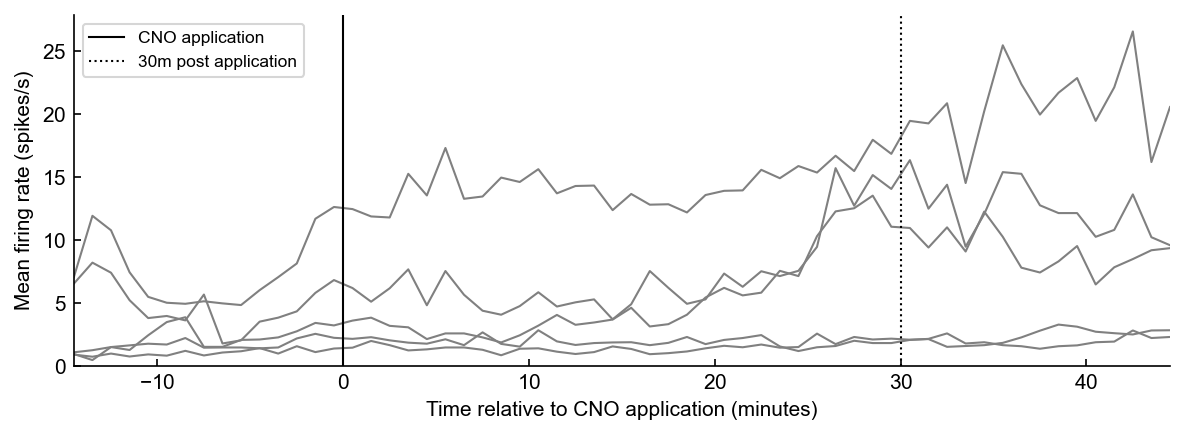

In [11]:
DIR = os.path.join('D:\\','Figures','CNO Traces')

application = sessionfile.meta.application_minutes
threshold = 1# Spikes/s

baselineSize = 6
validunits = []
for clust in sessionfile.clusters.good:
    
    if clust in cellsToRemove[session]:
        continue
    
    #Caching search
    idx = np.equal(sessionfile.spikes.clusters,clust)
    totaltimes = sessionfile.spikes.times[idx]
    
    #Calculate Baseline
    baselineStart = (application - baselineSize)*sessionfile.meta.fs*60
    baselineEnd = (application)*sessionfile.meta.fs*60
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,baselineStart) , np.less(totaltimes,baselineEnd)  )
    numspikesBaseline = np.sum(idx)
    
    if numspikesBaseline >= threshold * 60 * baselineSize:
        validunits.append(clust)

times = np.array(np.zeros(int(sessionfile.meta.length_in_minutes)))
rates = np.zeros(( int(sessionfile.meta.length_in_minutes) , len(validunits) ))
for minute in range(int(sessionfile.meta.length_in_minutes)):
    #The 0th minute is from minute 0 to minute 1, so the middle is 0.5
    times[minute] = minute+0.5
    
    #Caching search
    minutestart = 60*sessionfile.meta.fs*minute
    minuteend = 60*sessionfile.meta.fs*(minute+1)
    idx = np.logical_and(  np.greater(sessionfile.spikes.times,minutestart) , np.less(sessionfile.spikes.times,minuteend)  ).flatten()
    totaltimes = sessionfile.spikes.times[idx]
    totalclusters = sessionfile.spikes.clusters[idx]
    
    for clustidx in range(len(validunits)):
        clust = validunits[clustidx]
        idx = np.equal(totalclusters,clust)
        rates[minute,clustidx] = np.sum(idx) / 60

#times = np.array(times)
#rates = np.array(rates)
times = times - application

trans=0.25
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(times,rates,color='grey',alpha=1,lw=1)

ylims = ax.get_ylim()
ylims = [0,ylims[1]]
ax.plot([0,0],ylims,color='black',alpha=1,lw=1,label = 'CNO application')
ax.plot([30,30],ylims,color='black',alpha=1,lw=1,linestyle=':',label = '30m post application')
ax.legend()
ax.set_ylim(ylims)
ax.set_xlim(np.min(times),np.max(times))

ax.set_ylabel('Mean firing rate (spikes/s)')
ax.set_xlabel('Time relative to CNO application (minutes)')

plt.tight_layout()
plt.savefig(os.path.join(DIR,sessionfile.meta.animal+' '+str(sessionfile.meta.date).replace('/','-')+' Individual Units FR.png'),facecolor='white')

sig: False
pval: 0.9438757593041713


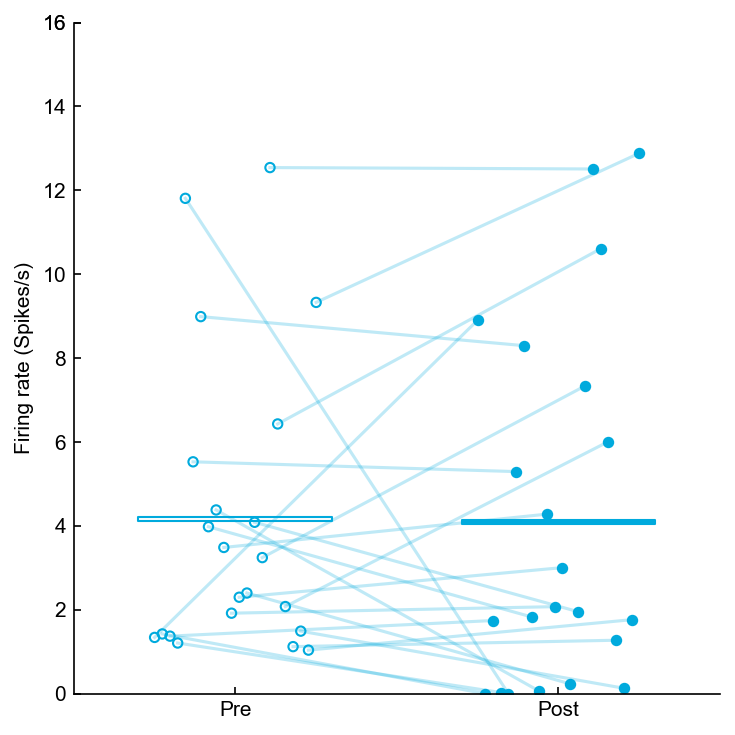

In [14]:
DIR = os.path.join('D:\\','Figures','CNO Boxplots')
application = sessionfile.meta.application_minutes
#recend = sessionfile.meta.application_minutes
recend = 3+30+sessionfile.meta.application_minutes
#recend = sessionfile.meta.length_in_minutes-1
#recend = 43.7

threshold = 1
sigTestSize = 6
trans=0.25

baseline = []
preData = []
postData = []
        
for clust in sessionfile.clusters.good:
    
    if clust in cellsToRemove[session]:
        continue
    
    #Caching search
    idx = np.equal(sessionfile.spikes.clusters,clust)
    totaltimes = sessionfile.spikes.times[idx]
    
    #Calculate Baseline
    baselineStart = (application - 1 * sigTestSize)*sessionfile.meta.fs*60
    baselineEnd = (application - 0 * sigTestSize)*sessionfile.meta.fs*60
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,baselineStart) , np.less(totaltimes,baselineEnd)  )
    numspikesBaseline = len(totaltimes[idx])
    
    #Calculate PreData
    preDataStart = (application - sigTestSize)*sessionfile.meta.fs*60
    preDataEnd = (application)*sessionfile.meta.fs*60
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,preDataStart) , np.less(totaltimes,preDataEnd)  )
    numspikesPre = len(totaltimes[idx])
    
    postDataStart = (recend - sigTestSize)*sessionfile.meta.fs*60
    postDataEnd = (recend)*sessionfile.meta.fs*60
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,postDataStart) , np.less(totaltimes,postDataEnd)  )
    numspikesPost = len(totaltimes[idx])

    if(numspikesBaseline >= (threshold*sigTestSize*60)):
        baseline.append(numspikesBaseline)
        preData.append(numspikesPre)
        postData.append(numspikesPost)
baseline = np.array(baseline)
preData = np.array(preData)
postData = np.array(postData)
    
baseline = preData
    
#Relative Corrections
#preData = np.divide(preData-baseline,baseline)*100
#postData = np.divide(postData-baseline,baseline)*100
preData = preData / 60 / sigTestSize
postData = postData / 60 / sigTestSize

test = ttest_rel(preData,postData)
pval = test[1]
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

fig,ax = plt.subplots(figsize=(5,5))
#ax.boxplot([preData,postData])

prexrange = np.linspace(1-0.25,1+0.25,num=len(preData))
xrange = np.linspace(2-0.25,2+0.25,num=len(postData))
for idx in range(len(postData)):
    ax.plot([prexrange[idx],xrange[idx]],[preData[idx],postData[idx]],color=CNO_COLOR,alpha=trans,zorder=-10)
ax.scatter(prexrange,preData,color=CNO_COLOR,s=20,alpha=1,fc='None')
ax.scatter(xrange,postData,color=CNO_COLOR,s=20,alpha=1)
premean = np.nanmean(preData)
postmean = np.nanmean(postData)

barthick = 0.25
barthick = 0.05
ax.fill_between([1-0.3,1+0.3],[premean-barthick,premean-barthick],[premean+barthick,premean+barthick],facecolor='None',edgecolor=CNO_COLOR,lw=1)
ax.fill_between([2-0.3,2+0.3],[postmean-barthick,postmean-barthick],[postmean+barthick,postmean+barthick],color=CNO_COLOR,lw=1)

#ax.plot([1-0.2,1+0.2],[premean,premean],color=CNO_COLOR,lw=3)
#ax.plot([2-0.2,2+0.2],[postmean,postmean],color=CNO_COLOR,lw=3)

ax.set_ylabel('Firing rate (Spikes/s)')
#ax.set_title(sessionfile.meta.animal+'\np = '+str(np.round(pval,4))+'\nwindow = '+str(sigTestSize)+' min')
#ax.set_title(sessionfile.meta.animal+'\n'+sessionfile.meta.date)
ax.set_xticks([1,2])
ax.set_xticklabels(['Pre','Post'])

ax.set_xlim([0.5,2.5])

#Make sure there's a top tick
##ax.set_ylim([0,10])
#ax.set_ylim([0,50])
##ax.set_ylim([0,30])
##ax.set_ylim([0,20])
##ax.set_ylim([0,12])
ax.set_ylim([0,16])
ticks = ax.get_yticks()
ticks = np.concatenate((ticks,[ax.get_ylim()[1]]))
ax.set_yticks(ticks)

#Plot Significance Bar
if sig:
    text = '*'
else:
    text = 'n.s.'
#x = 1.5
#y = ax.get_ylim()[1]*0.9
#props = {'connectionstyle':'bar','arrowstyle':'-',\
#    'shrinkA':20,'shrinkB':20,'linewidth':1}
##ax.annotate(text, xy=(x,y+3.5), zorder=10,ha='center')
#ax.annotate(text, xy=(x,y+7.5), zorder=10,ha='center')
##ax.annotate(text, xy=(x,y+5.03), zorder=10,ha='center')
##ax.annotate(text, xy=(x,y+2), zorder=10,ha='center')
##ax.annotate(text, xy=(x,y+1), zorder=10,ha='center')
#ax.annotate('', xy=(1,y), xytext=(2,y), arrowprops=props)

plt.tight_layout()
plt.savefig(os.path.join(DIR,sessionfile.meta.animal+' '+str(sessionfile.meta.date).replace('/','-')+' FR Scatterplot '+str(sigTestSize)+' min.png'),facecolor='white')

In [15]:
len(validunits)

22

In [9]:
sessions = ['PB_121_allunits_CNO_5-20-2022_M2.pickle','PB_122_allunits_CNO_5-20-2022_M2.pickle','PB_122_allunits_CNO_5-23-2022_M2.pickle','PB_124_allunits_CNO_5-26-2022_M2.pickle']
print(sessions)

['PB_121_allunits_CNO_5-20-2022_M2.pickle', 'PB_122_allunits_CNO_5-20-2022_M2.pickle', 'PB_122_allunits_CNO_5-23-2022_M2.pickle', 'PB_124_allunits_CNO_5-26-2022_M2.pickle']


6
9
20
21
23
24
53
58
80
117
PB_122_allunits_CNO_5-20-2022_M2.pickle==> cluster #117
126
141
158
169
203
PB_122_allunits_CNO_5-20-2022_M2.pickle==> cluster #203
sig: True
pval: 0.0032847859890385678
n = 44 from 4 recordings in 3 animals
2.8916666666666666: 7
0.7750000000000001: 9
0.002777777777777324: 10
13.363888888888892: 13
12.61111111111111: 18
0.7999999999999998: 32
0.18055555555555536: 38
1.277777777777778: 39
0.008333333333333304: 40


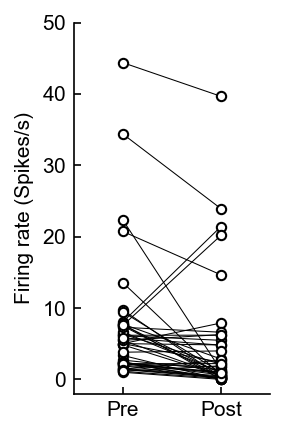

In [45]:
DIR = os.path.join('D:\\','Figures','CNO Boxplots')

threshold = 1
sigTestSize = 6
trans=1

baseline = []
preData = []
postData = []
    
thisidx = 0
for session in sessions:
    sessionfile = ilep.loadSessionCached(directory,session)
    
    application = sessionfile.meta.application_minutes
    recend = 30+sessionfile.meta.application_minutes
    
    for clust in sessionfile.clusters.good:
        #Caching search
        idx = np.equal(sessionfile.spikes.clusters,clust)
        totaltimes = sessionfile.spikes.times[idx]

        #Calculate Baseline
        baselineStart = (application - 2 * sigTestSize)*sessionfile.meta.fs*60
        baselineEnd = (application - sigTestSize)*sessionfile.meta.fs*60
        #Caching search
        idx = np.logical_and(  np.greater(totaltimes,baselineStart) , np.less(totaltimes,baselineEnd)  )
        numspikesBaseline = len(totaltimes[idx])

        #Calculate PreData
        preDataStart = (application - sigTestSize)*sessionfile.meta.fs*60
        preDataEnd = (application)*sessionfile.meta.fs*60
        #Caching search
        idx = np.logical_and(  np.greater(totaltimes,preDataStart) , np.less(totaltimes,preDataEnd)  )
        numspikesPre = len(totaltimes[idx])

        postDataStart = (recend)*sessionfile.meta.fs*60
        postDataEnd = (recend+sigTestSize)*sessionfile.meta.fs*60
        #Caching search
        idx = np.logical_and(  np.greater(totaltimes,postDataStart) , np.less(totaltimes,postDataEnd)  )
        numspikesPost = len(totaltimes[idx])

        if(numspikesBaseline >= (threshold*sigTestSize*60)):
            baseline.append(numspikesBaseline)
            preData.append(numspikesPre)
            postData.append(numspikesPost)
            
            if session == 'PB_122_allunits_CNO_5-20-2022_M2.pickle':
                print(clust)
            
            if thisidx==13 or thisidx==18:
                print(session + '==> cluster #'+str(clust))
            thisidx+=1 
baseline = np.array(baseline)
preData = np.array(preData)
postData = np.array(postData)
    
baseline = preData
    
#Relative Corrections
#preData = np.divide(preData-baseline,baseline)*100
#postData = np.divide(postData-baseline,baseline)*100
preData = preData / 60 / sigTestSize
postData = postData / 60 / sigTestSize

test = ttest_rel(preData,postData)
pval = test[1]
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))
print('n = '+str(len(preData))+' from '+str(len(sessions))+' recordings in 3 animals')

fig,ax = plt.subplots(figsize=(2,3))
#ax.boxplot([preData,postData])

width = 0.35
prexrange = np.zeros(len(preData))+1 #np.linspace(1-width,1+width,num=len(preData))
xrange = np.zeros(len(postData))+2 #np.linspace(2-width,2+width,num=len(postData))
for idx in range(len(postData)):
    ax.plot([prexrange[idx],xrange[idx]],[preData[idx],postData[idx]],color=CNO_COLOR,alpha=trans,lw=0.5,zorder=-10)
    
    if postData[idx] - preData[idx] > 0:
        print(str(postData[idx] - preData[idx]) + ': '+str(idx))
    
ax.scatter(prexrange,preData,color=CNO_COLOR,s=20,alpha=1,fc='white')
ax.scatter(xrange,postData,color=CNO_COLOR,s=20,alpha=1,fc='white')
premean = np.nanmean(preData)
postmean = np.nanmean(postData)

#barwidth = 0.3
#barthick = 0.25
##barthick = 0.05
#ax.fill_between([1-barwidth,1+barwidth],[premean-barthick,premean-barthick],[premean+barthick,premean+barthick],facecolor='None',edgecolor=CNO_COLOR,lw=1)
#ax.fill_between([2-barwidth,2+barwidth],[postmean-barthick,postmean-barthick],[postmean+barthick,postmean+barthick],color=CNO_COLOR,lw=1)

#ax.plot([1-0.2,1+0.2],[premean,premean],color=CNO_COLOR,lw=3)
#ax.plot([2-0.2,2+0.2],[postmean,postmean],color=CNO_COLOR,lw=3)

ax.set_ylabel('Firing rate (Spikes/s)')
#ax.set_title(sessionfile.meta.animal+'\np = '+str(np.round(pval,4))+'\nwindow = '+str(sigTestSize)+' min')
#ax.set_title(sessionfile.meta.animal+'\n'+sessionfile.meta.date)
ax.set_xticks([1,2])
ax.set_xticklabels(['Pre','Post'])

ax.set_xlim([0.5,2.5])

##Make sure there's a top tick
#ax.set_ylim([0,50])
##ax.set_ylim([0,8])
#ticks = ax.get_yticks()
#ticks = np.concatenate((ticks,[ax.get_ylim()[1]]))
#ax.set_yticks(ticks)

ax.set_yticks([0,10,20,30,40,50])
ax.set_ylim([-2,50])

plt.tight_layout()
plt.savefig(os.path.join(DIR,'Pooled FR Scatterplot '+str(sigTestSize)+' min.pdf'),facecolor='white')

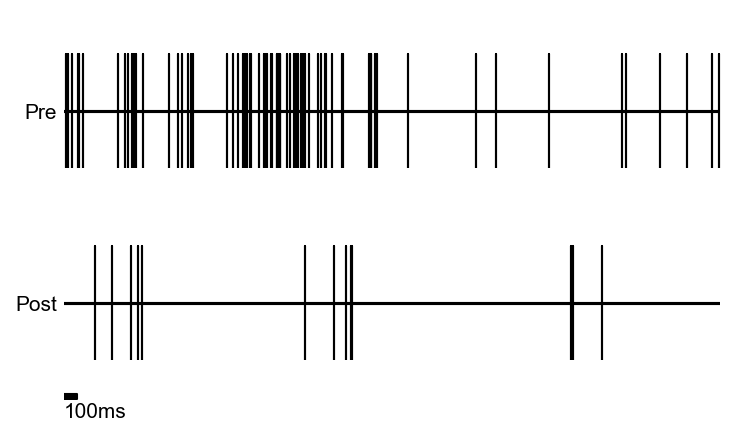

In [211]:
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

application = sessionfile.meta.application_minutes
baselinesize = 6

Pre = 0 + application
Post = 30 + application
testsize = 5# seconds
#offset = -30
#offset = -6
offset = offset - 1

pretotaltimes = []
posttotaltimes = []

for clust in sessionfile.clusters.good:
    #Caching search
    idx = np.equal(sessionfile.spikes.clusters,clust)
    totaltimes = sessionfile.spikes.times[idx]
    
    #Calculate Baseline
    baselineStart = (application - baselinesize)*sessionfile.meta.fs*60
    baselineEnd = (application)*sessionfile.meta.fs*60
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,baselineStart) , np.less(totaltimes,baselineEnd)  )
    FRBaseline = len(totaltimes[idx]) / 60 / baselinesize
    
    if FRBaseline < 1:
        continue
        
    #Pre
    preStart = Pre*sessionfile.meta.fs*60 - testsize*sessionfile.meta.fs + offset*sessionfile.meta.fs
    preEnd = Pre*sessionfile.meta.fs*60 + offset*sessionfile.meta.fs
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,preStart) , np.less(totaltimes,preEnd)  )
    pretimes = (totaltimes[idx] - preStart) / sessionfile.meta.fs * 1000
    
    #Post
    postStart = Post*sessionfile.meta.fs*60 - testsize/2*sessionfile.meta.fs + offset*sessionfile.meta.fs
    postEnd = Post*sessionfile.meta.fs*60 + testsize/2*sessionfile.meta.fs + offset*sessionfile.meta.fs
    #Caching search
    idx = np.logical_and(  np.greater(totaltimes,postStart) , np.less(totaltimes,postEnd)  )
    posttimes = (totaltimes[idx] - postStart) / sessionfile.meta.fs * 1000
    
    
    pretotaltimes = np.concatenate((pretotaltimes,pretimes))
    posttotaltimes = np.concatenate((posttotaltimes,posttimes))
    
height=1000000
width=1
custommarker = mpl.path.Path([[-width,-height],[-width,height],[width,height],[width,-height]],closed=True)


fig,ax = plt.subplots(figsize=(5,3))
ax.scatter(pretotaltimes,np.zeros(len(pretotaltimes)),color='black',marker=custommarker.vertices,s=3000)
ax.plot([0,testsize*1000],[0,0],color='black')

ax.scatter(posttotaltimes,np.zeros(len(posttotaltimes))-1,color='black',marker=custommarker.vertices,s=3000)
ax.plot([0,testsize*1000],[-1,-1],color='black')

ax.set_ylim([-1.5,0.5])
ax.set_xlim([0,testsize*1000])

ax.set_xticks([])
ax.set_yticks([0,-1])
ax.ticklabel_format(style='plain')
ax.set_yticklabels(['Pre','Post'])

ax.fill_between([0,100],[-1.5,-1.5],[-1.475,-1.475],color='black')
ax.text(0,-1.6,'100ms')

plt.tight_layout()
DIR = os.path.join('D:\\','Figures','CNO SpikeTrains')
plt.savefig(os.path.join(DIR,sessionfile.meta.animal+' '+str(sessionfile.meta.date).replace('/','-')+' CNO Spiketrain.png'),facecolor='white')

plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True